#Installation des packages utiles pour le Unsupervised Learning

In [ ]:
!pip install tslearn
!pip install kmodes

In [ ]:
%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
import pandas as pd

#Import des données

In [ ]:
# URLs of the data
url_X = 'http://allousame.free.fr/mlds/donnees/X.txt'
url_APPART = 'http://allousame.free.fr/mlds/donnees/APPART.txt'
url_JOUR = 'http://allousame.free.fr/mlds/donnees/JOUR.txt'

# Load data from URLs into DataFrames
X = pd.read_table(url_X, header=None, sep=' ')  # Loading X data
APPART = pd.read_table(url_APPART, header=None, sep=' ')  # Loading APPART data
JOUR = pd.read_table(url_JOUR, header=None, sep=' ')  # Loading JOUR data

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.786785,-1.759306,-1.731826,-1.657497,-1.504801,-1.303554,-1.099353,-0.939600,-0.834307,-0.642136,...,1.796293,1.746644,1.617929,1.374530,0.991029,0.564313,0.200768,-0.077526,-0.276923,-0.433195
1,-0.394478,-0.634234,-0.873990,-1.012224,-0.992106,-0.935577,-0.966903,-1.040886,-1.074217,-1.000619,...,0.835603,0.970470,1.115326,1.143106,0.943505,0.560883,0.094956,-0.287792,-0.456911,-0.492853
2,-1.216742,-1.395422,-1.574103,-1.741657,-1.879992,-1.943143,-1.897188,-1.784239,-1.650855,-1.485354,...,1.153940,1.267196,1.333831,1.347890,1.308287,1.199404,1.006899,0.736046,0.401007,0.031883
3,-0.796512,-1.189678,-1.582845,-1.883616,-2.029875,-2.080617,-2.097591,-2.032449,-1.835092,-1.558510,...,1.156785,1.309893,1.248746,1.033263,0.756840,0.522058,0.398940,0.318105,0.197855,0.046630
4,-0.077746,-0.709023,-1.340300,-1.873472,-2.216010,-2.297673,-2.089215,-1.703073,-1.269871,-0.851312,...,1.526477,1.661399,1.647645,1.470649,1.130163,0.676563,0.177488,-0.281004,-0.634296,-0.921962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,-1.373892,-1.611674,-1.849456,-2.037723,-2.138310,-2.158456,-2.107608,-1.958650,-1.691850,-1.353598,...,0.529951,0.485765,0.556992,0.652746,0.672439,0.626687,0.549977,0.461084,0.372155,0.284557
9096,-1.061133,-1.326168,-1.591203,-1.909054,-2.301337,-2.664871,-2.876890,-2.861083,-2.578586,-2.093864,...,0.998410,1.241800,1.266223,1.095714,0.790980,0.405643,0.011605,-0.239013,-0.229034,-0.061260
9097,-0.703021,-0.931821,-1.160621,-1.357542,-1.493810,-1.553057,-1.536860,-1.506154,-1.502012,-1.426687,...,1.005878,0.941988,0.802163,0.677693,0.636938,0.584028,0.414505,0.153798,-0.147069,-0.464579
9098,-0.687142,-0.963776,-1.240411,-1.459325,-1.576649,-1.603905,-1.569288,-1.512294,-1.474450,-1.494115,...,0.660649,0.686355,0.658493,0.573240,0.422843,0.215098,-0.032531,-0.279474,-0.491025,-0.679058


In [ ]:
APPART

,0
0,1
1,1
2,1
3,1
4,1
...,...
9095,100
9096,100
9097,100
9098,100


In [ ]:
JOUR

,0
0,1
1,2
2,3
3,4
4,5
...,...
9095,87
9096,88
9097,89
9098,90


In [ ]:
# Add 'APPART' as a column to DataFrame X_APPART
X_APPART = X.copy()
X_APPART['APPART'] = APPART.iloc[:, 0]
# Add 'JOUR' as a column to DataFrame X_APPART_JOUR
X_APPART_JOUR = X_APPART.copy()
X_APPART_JOUR['JOUR'] = JOUR.iloc[:, 0]

In [ ]:
# Extract the columns that are not 'APPART' or 'JOUR'
other_columns = [col for col in X_APPART_JOUR.columns if col not in ['APPART', 'JOUR']]
# Reorder the DataFrame by placing 'APPART' and 'JOUR' at the beginning, followed by other columns
X_APPART_JOUR = X_APPART_JOUR[['APPART', 'JOUR'] + other_columns]

In [ ]:
X_APPART_JOUR.shape

(9100, 50)

In [ ]:
X_APPART_JOUR

,APPART,JOUR,0,1,2,3,4,5,6,7,...,38,39,40,41,42,43,44,45,46,47
0,1,1,-1.786785,-1.759306,-1.731826,-1.657497,-1.504801,-1.303554,-1.099353,-0.939600,...,1.796293,1.746644,1.617929,1.374530,0.991029,0.564313,0.200768,-0.077526,-0.276923,-0.433195
1,1,2,-0.394478,-0.634234,-0.873990,-1.012224,-0.992106,-0.935577,-0.966903,-1.040886,...,0.835603,0.970470,1.115326,1.143106,0.943505,0.560883,0.094956,-0.287792,-0.456911,-0.492853
2,1,3,-1.216742,-1.395422,-1.574103,-1.741657,-1.879992,-1.943143,-1.897188,-1.784239,...,1.153940,1.267196,1.333831,1.347890,1.308287,1.199404,1.006899,0.736046,0.401007,0.031883
3,1,4,-0.796512,-1.189678,-1.582845,-1.883616,-2.029875,-2.080617,-2.097591,-2.032449,...,1.156785,1.309893,1.248746,1.033263,0.756840,0.522058,0.398940,0.318105,0.197855,0.046630
4,1,5,-0.077746,-0.709023,-1.340300,-1.873472,-2.216010,-2.297673,-2.089215,-1.703073,...,1.526477,1.661399,1.647645,1.470649,1.130163,0.676563,0.177488,-0.281004,-0.634296,-0.921962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,100,87,-1.373892,-1.611674,-1.849456,-2.037723,-2.138310,-2.158456,-2.107608,-1.958650,...,0.529951,0.485765,0.556992,0.652746,0.672439,0.626687,0.549977,0.461084,0.372155,0.284557
9096,100,88,-1.061133,-1.326168,-1.591203,-1.909054,-2.301337,-2.664871,-2.876890,-2.861083,...,0.998410,1.241800,1.266223,1.095714,0.790980,0.405643,0.011605,-0.239013,-0.229034,-0.061260
9097,100,89,-0.703021,-0.931821,-1.160621,-1.357542,-1.493810,-1.553057,-1.536860,-1.506154,...,1.005878,0.941988,0.802163,0.677693,0.636938,0.584028,0.414505,0.153798,-0.147069,-0.464579
9098,100,90,-0.687142,-0.963776,-1.240411,-1.459325,-1.576649,-1.603905,-1.569288,-1.512294,...,0.660649,0.686355,0.658493,0.573240,0.422843,0.215098,-0.032531,-0.279474,-0.491025,-0.679058


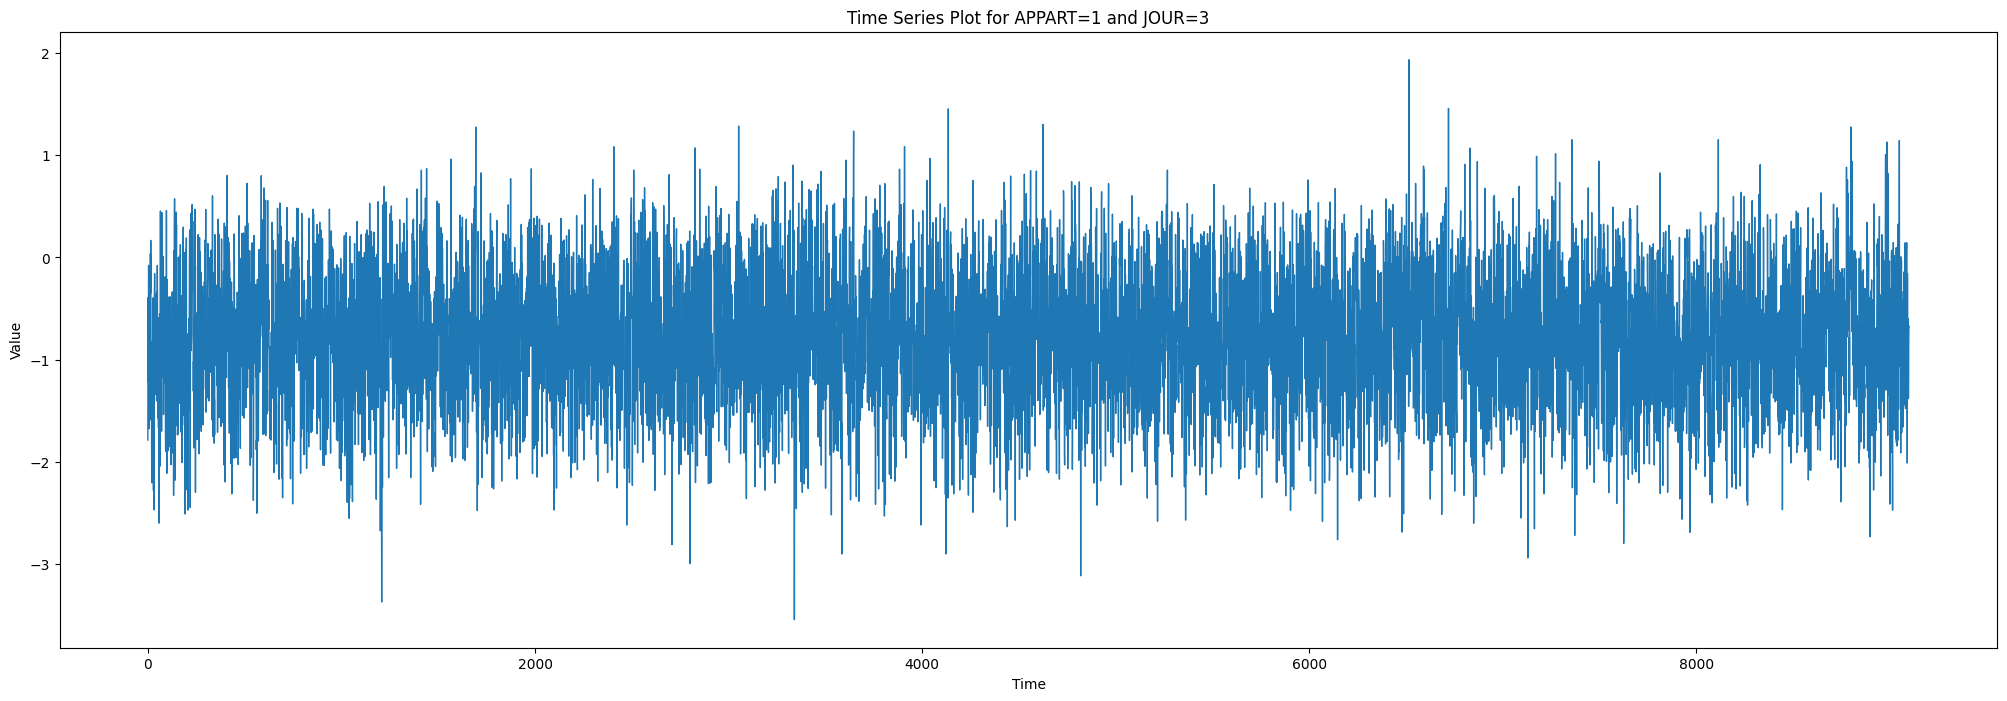

In [ ]:
# Selecting the data for APPART=1 and JOUR=3
plt.plot(X_APPART_JOUR[('APPART' == 1) & ('JOUR' == 3)], linestyle="-", linewidth=1)

# Adding title, xlabel, and ylabel
plt.title('Time Series Plot for APPART=1 and JOUR=3')
plt.xlabel('Time')
plt.ylabel('Value')

# Display the plot
plt.show()

#Partie 1 :

In [ ]:
# Transform your time series data X into a format compatible with tslearn
X = to_time_series_dataset(X)

###Normalisation

Ici on normalise nos données temporelles avec TimeSeriesScalerMeanVariance, et on extrait la taille de la fenêtre temporelle de nos données prétraitées pour une utilisation ultérieure. Ces étapes sont necéssaires pour préparer les données avant d'appliquer des algorithmes de séries temporelles ou de machine learning.

In [ ]:
seed = 0
np.random.seed(seed)
X = TimeSeriesScalerMeanVariance().fit_transform(X)
sz = X.shape[1]

##Clustering du dataset X

###K-means avec la méthode Coude

La méthode du coude (Elbow Method en anglais) est une technique utilisée pour déterminer le nombre optimal de clusters dans un ensemble de données lors de l'utilisation d'algorithmes de clustering tels que K-means. Cette méthode est basée sur l'idée que l'ajout de plus de clusters améliorera la réduction de l'inertie, mais à un moment donné, cette amélioration sera marginale, formant ainsi un "coude" dans le graphique de l'inertie en fonction du nombre de clusters.

 Il faut chercher visuellement le point où la courbe de l'inertie commence à se stabiliser ou à diminuer à un taux moins significatif après avoir diminué de manière significative. Ce point ressemble souvent à un coude.

In [ ]:
inerties_a = []
K = range(2,8)
for k in K:
    print(k)
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="euclidean",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)

    km = km.fit(X)
    inerties_a.append(km.inertia_)

2
3
4
5
6
7


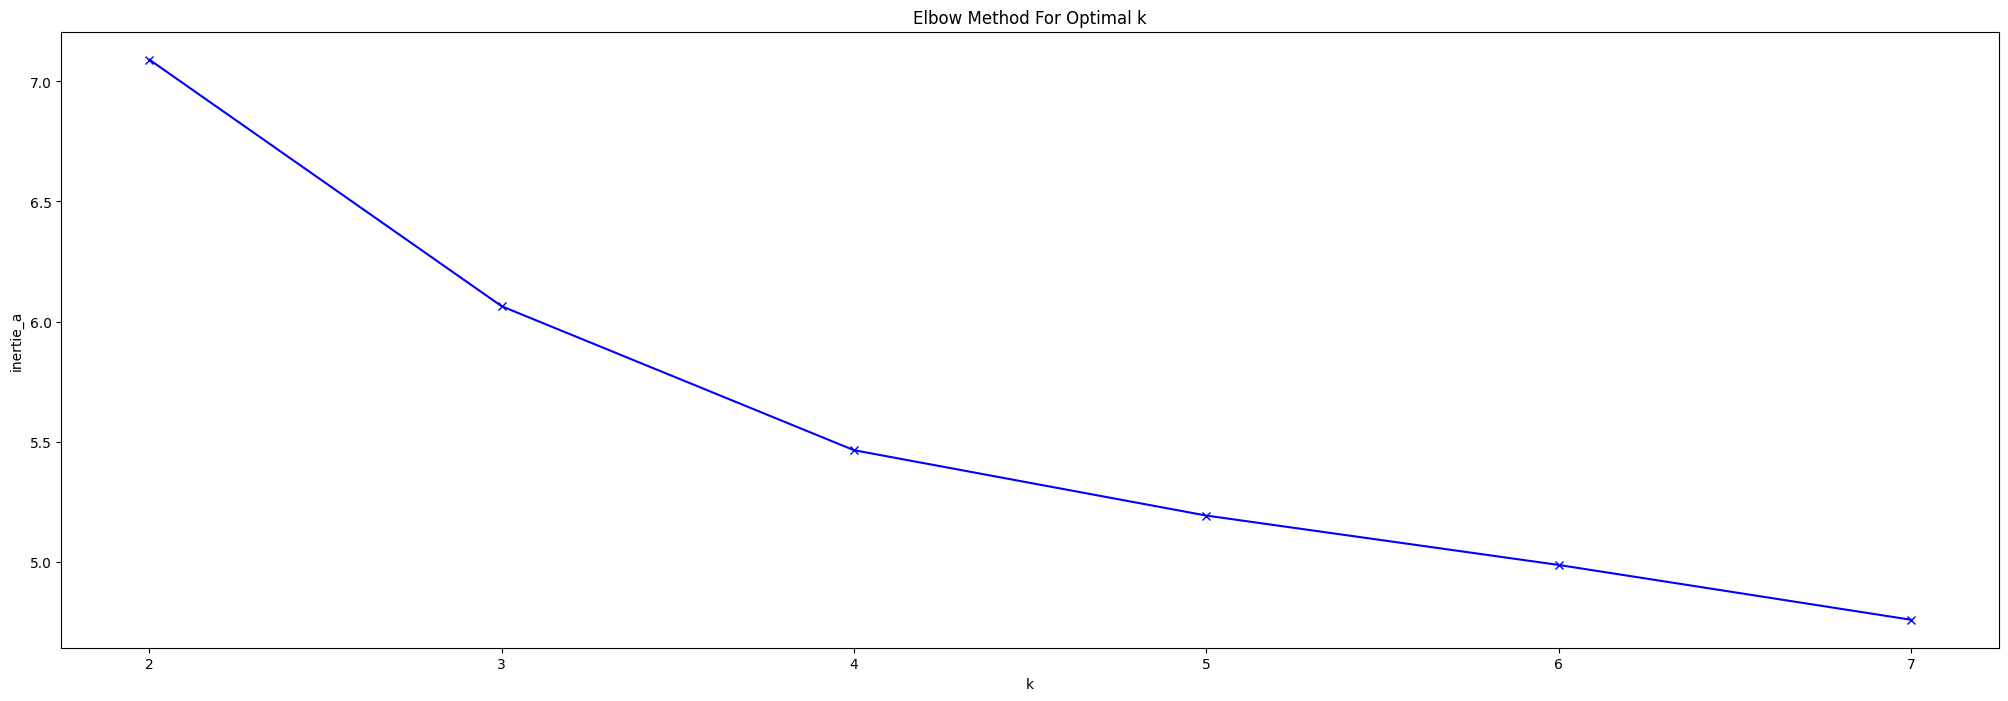

In [ ]:
plt.plot(list(range(2, 8)), inerties_a, 'bx-')
plt.xlabel('k')
plt.ylabel('inertie_a')
plt.title('Elbow Method For Optimal k')
plt.show()

D'après le graphe du coude obtenu ci-dessus nous pouvons déduire ce qui suit:

Nombre optimal de clusters : Le point de coude à K=4 indique qu'à partir de ce nombre de clusters, l'ajout de clusters supplémentaires diminue l'inertie de manière moins significative. Cela suggère que le nombre optimal de clusters pour nos données pourrait être 4.


###K-means (K=4)

On applique le clustering avec k-means sur l'ensemble de données X avec un
nombre de cluster égale à 4.

In [ ]:
n_clusters=4
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=seed)
cluster_labels = km.fit_predict(X)

Euclidean k-means


Mesurer le score de l'inertie intra_classes et le score de la silouhette

In [ ]:
print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X, cluster_labels, metric="euclidean")))
# Show inertia
print("Euclidean Inertia: {:.2f}".format(km.inertia_))

Euclidean silhoutte: 0.18
Euclidean Inertia: 5.46


Les labels associés aux lignes de la table X

In [ ]:
cluster_labels

array([3, 3, 3, ..., 3, 2, 2])

### Visualisation du nuage de points X

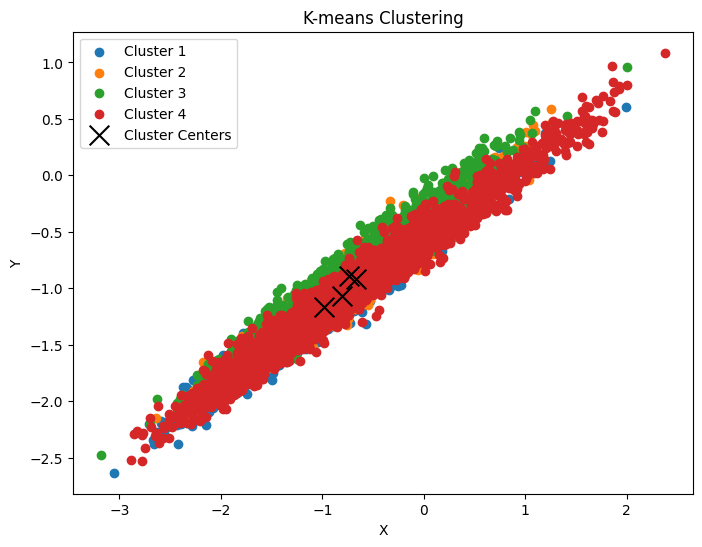

In [ ]:
plt.figure(figsize=(8, 6))

# Plotting each cluster
for cluster in range(n_clusters):
    plt.scatter(X[cluster_labels == cluster][:, 0], X[cluster_labels == cluster][:, 1], label=f'Cluster {cluster + 1}')

# Plotting cluster centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Visualisation du nuage de points X avec l'ACP

L'utilisation de l'Analyse en Composantes Principales (ACP) dans le contexte du clustering de séries temporelles peut apporter plusieurs avantages et interprétations :

Réduction de la dimensionnalité : Les données de séries temporelles peuvent souvent être complexes, avec de nombreuses dimensions (timestamp, features, etc.). L'ACP réduit la dimensionnalité en transformant ces données en un nombre inférieur de composantes principales tout en conservant autant que possible l'information contenue dans les données initiales. Cela permet de simplifier la représentation tout en préservant les tendances et structures importantes.

Visualisation améliorée : En réduisant les données à seulement deux ou trois composantes principales à l'aide de l'ACP, il devient possible de visualiser les clusters dans un espace en deux ou trois dimensions. Cela permet une meilleure compréhension visuelle de la structure des clusters et de leurs relations spatiales.

Interprétation des clusters : La PCA peut révéler des tendances générales ou des corrélations entre les séries temporelles. Ainsi, si les clusters sont bien séparés dans l'espace des composantes principales, cela pourrait indiquer des différences significatives dans les tendances ou les caractéristiques des séries temporelles entre les clusters.

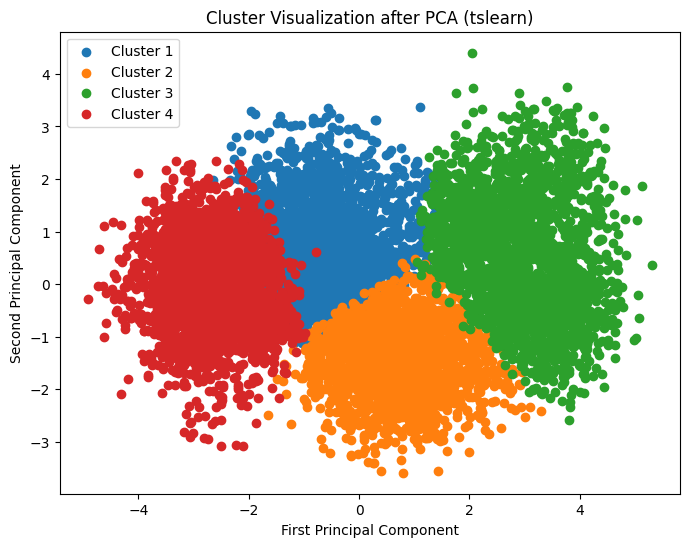

In [ ]:
# Reshape the 3D time series data into 2D for PCA
n_samples, n_timestamps, n_features = X.shape
X_reshaped = np.reshape(X, (n_samples, n_timestamps * n_features))

# Create an instance of PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)

# Apply PCA on the scaled time series data
X_pca = pca.fit_transform(X_reshaped)

# Visualize clusters in the reduced space using the first two principal components
plt.figure(figsize=(8, 6))

# Plotting the clusters based on the PCA-reduced data
for cluster in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1],
                label=f'Cluster {cluster + 1}')

plt.title('Cluster Visualization after PCA (tslearn)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

Le graphe montré ci-dessus nous permet de visualiser bien les clusters générés par la méthode k-means. On voit clairement que les données sont bien séparées en 4 classes.

###Visualisation des séries temporelles de X avec les moyennes de chaque cluster

La visualisation des séries temporelles de X avec les moyennes de chaque cluster pourrait fournir plusieurs informations importantes concernant la structure des clusters et les distributions générales présentes dans vos données.

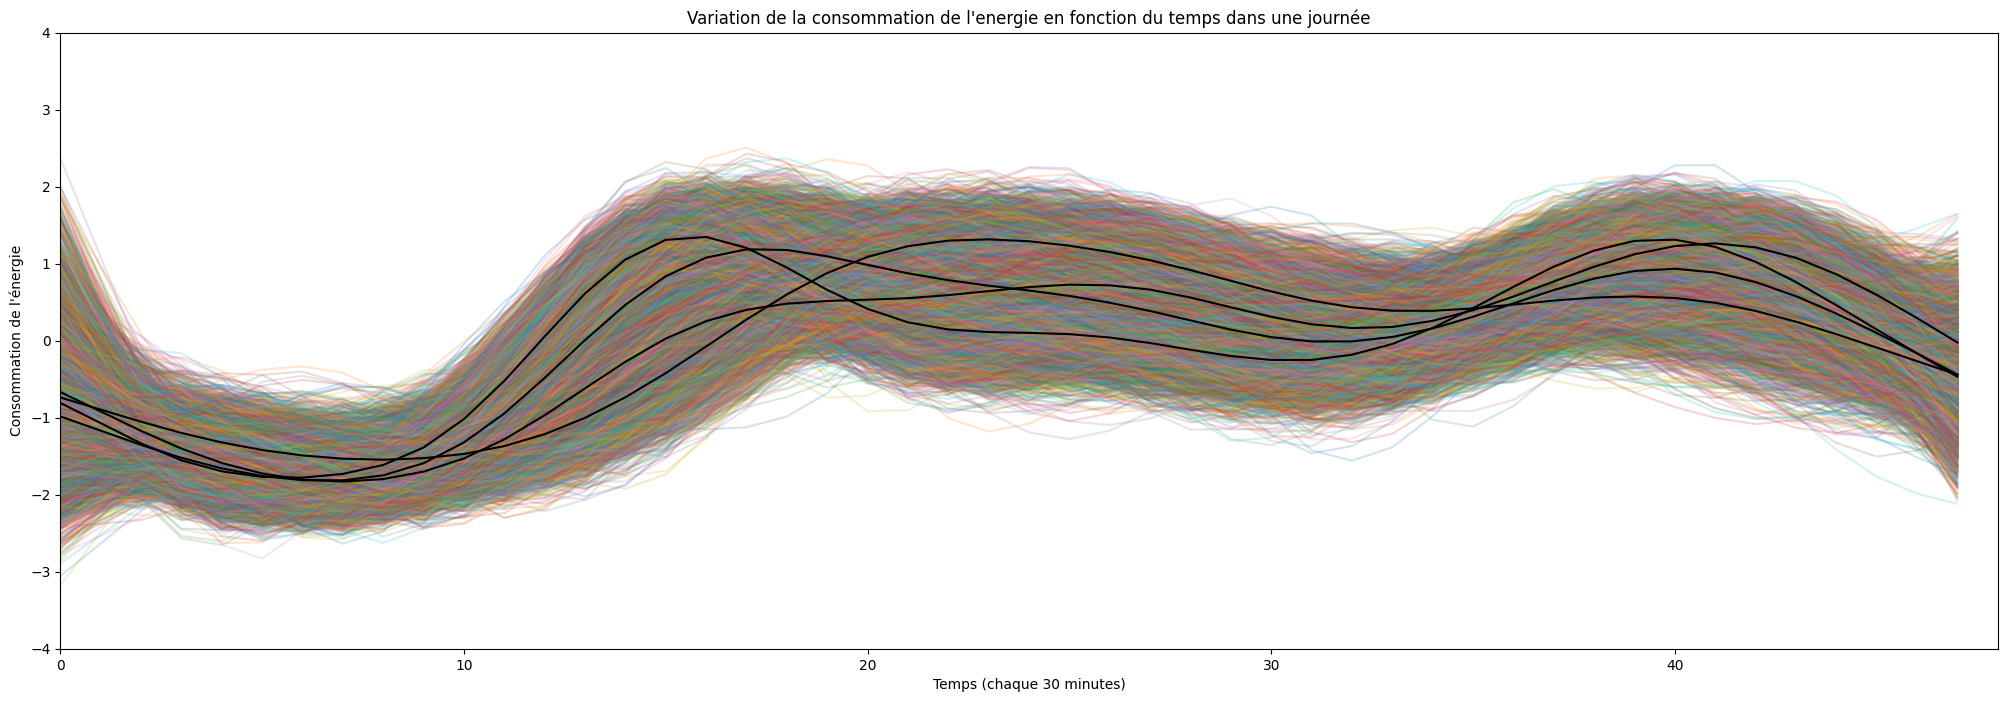

In [ ]:
plt.figure()

for xx in X:
    plt.plot(xx.ravel(), alpha=0.2)

for center in km.cluster_centers_:
    plt.plot(center.ravel(), color="black")

plt.xlim(0, sz)
plt.ylim(-4, 4)

plt.xlabel('Temps (chaque 30 minutes)')
plt.ylabel("Consommation de l'énergie")
plt.title("Variation de la consommation de l'energie en fonction du temps dans une journée")
plt.show()


On voit pas bien la séparation des clusters. Pour cela on utilise de couleurs différentes pour chaque cluster.

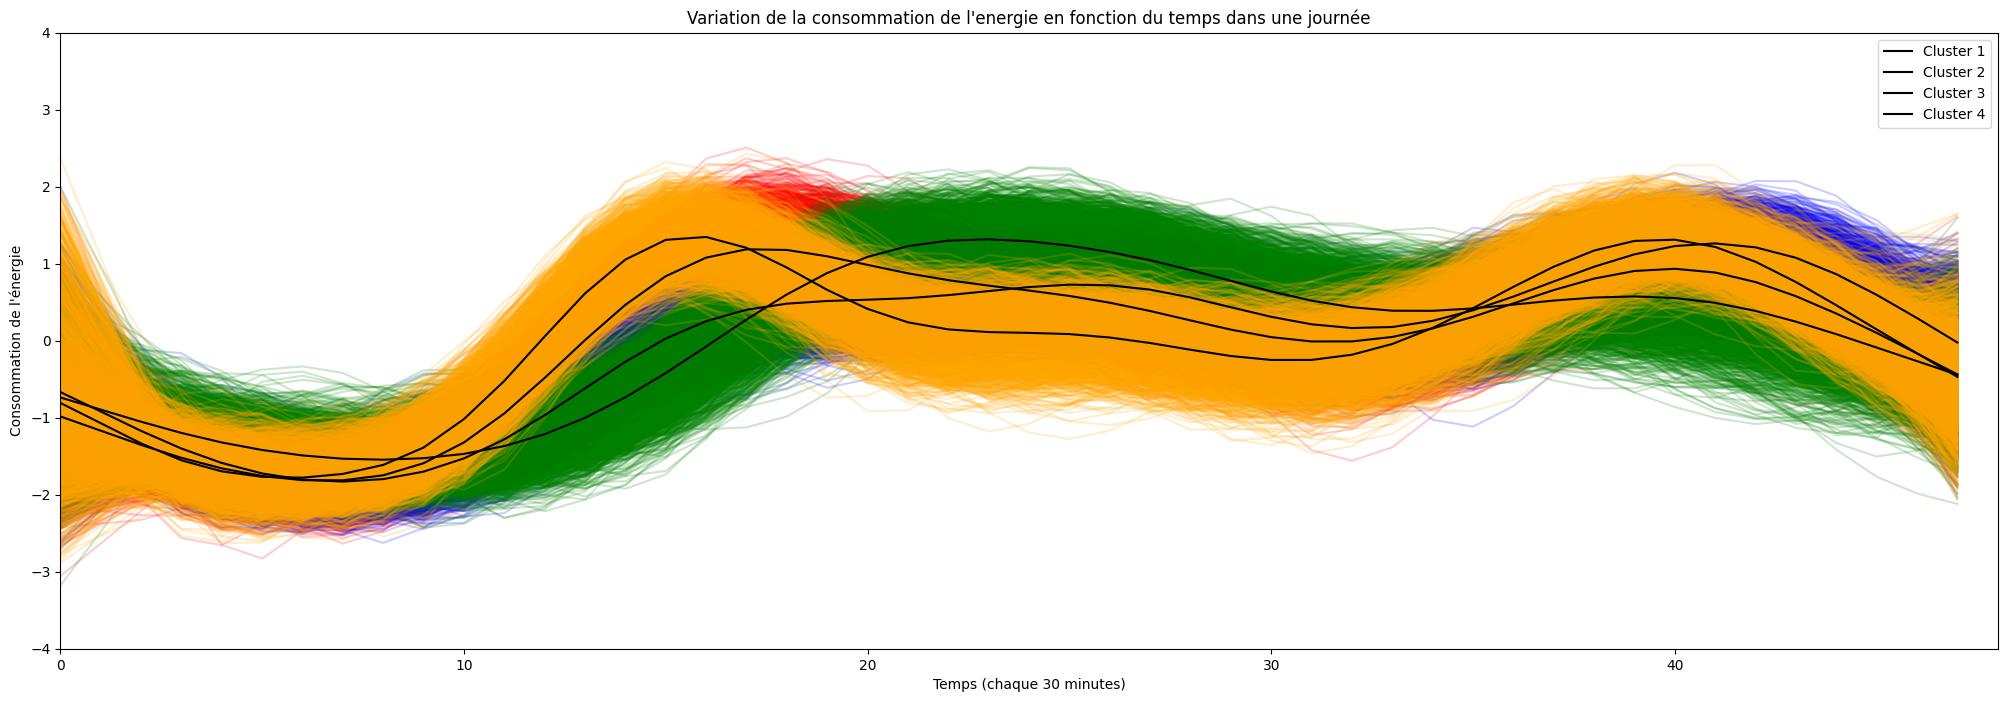

In [ ]:
plt.figure()
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for clusters

for yi in range(n_clusters):
    for xx in X[cluster_labels == yi]:
        plt.plot(xx.ravel(), color=colors[yi], alpha=0.2)

for yi, center in enumerate(km.cluster_centers_):
    plt.plot(center.ravel(), color="black", label=f'Cluster {yi + 1}')

plt.xlim(0, sz)
plt.ylim(-4, 4)
plt.title("Variation de la consommation de l'energie en fonction du temps dans une journée")

plt.xlabel('Temps (chaque 30 minutes)')
plt.ylabel("Consommation de l'énergie")

plt.legend()
plt.show()

Afin de mieux visualiser le comportement similaire entre les séries appartenantes au même cluster on sépare la représentation graphique de chaque cluster.

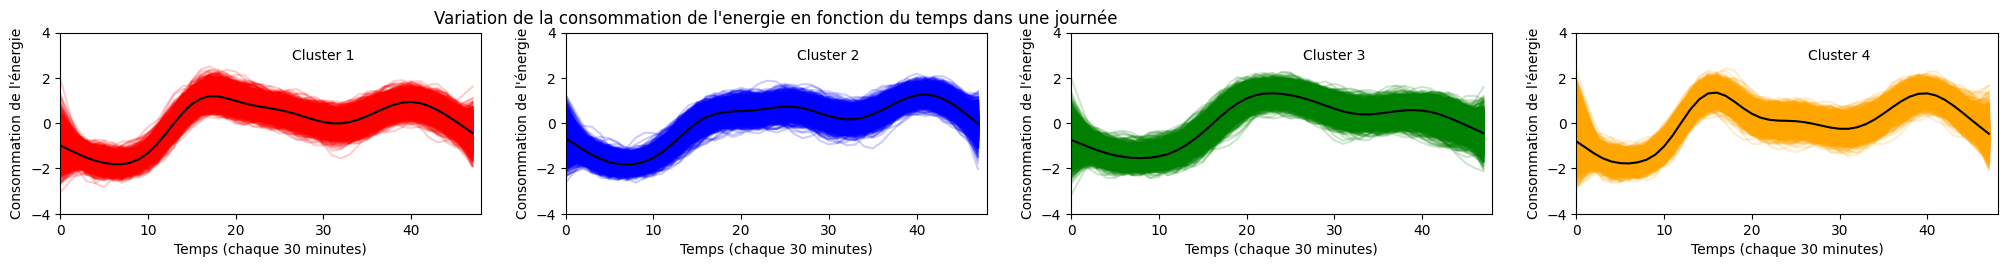

In [ ]:
plt.figure()
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for clusters


for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 1)
    for xx in X[cluster_labels == yi]:
        if isinstance(xx, (list, np.ndarray)):
            plt.plot(np.array(xx).ravel(), color=colors[yi], alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(),  color="black")
    plt.xlabel('Temps (chaque 30 minutes)')
    plt.ylabel("Consommation de l'énergie")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Variation de la consommation de l'energie en fonction du temps dans une journée")

Selon les graphes montrés ci-dessus, on voit bien que les séries appartenantes au même cluster ont la même distribution au cours du temps. On remarque également que le cluster 3 présente une faible consommation de l'énergie jusqu'à t=20*30/60=10h. On peut déduire que le cluster 2 montre la consommation de l'énergie dans le weekend ou les gens ne se réveillent pas tôt.

On remarque que le cluster 2 présente une faible consommation de l'énergie tout au long de la journée. Ce qui nous mène à supposer que les gens ne sont pas chez eux jusqu'à la nuit. On pourra également supposer que le cluster 2 présente les vacances des 3 semaines ou les gens sortent profiter et rentrent tard chez eux.

On remarque également que les clusters 1 et 4 présente une grande consommation de l'énergie dans les horaires: t1=15*30/60=7h50min et t2=40*30/60=20h. On peut supposer que ces clusters présentes des périodes ou les gens sont en plein activité (les tarvailleurs aillent à leurs emplois, les élèves et les étudiants aillent à l'école et à l'université). Et plus précisément, le cluster 4 présente une consommation d'énergie supérieure à celle du cluster 1. On pourra déduire que le cluster 4 présente les jours ou les gens consomment plus d'énergie, par exemple dans l'hivers ou les chauffage sont allumés et l'électricité également dans les appartements vu que la nuit tombe assez tôt.

#Cluster Distribution

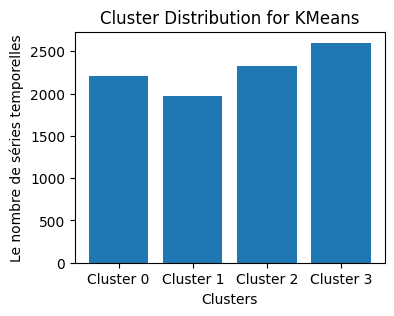

In [ ]:
cluster_c = [len(cluster_labels[cluster_labels==i]) for i in range(n_clusters)]
cluster_n = ["Cluster "+str(i) for i in range(n_clusters)]
plt.figure(figsize=(4,3))
plt.title("Cluster Distribution for KMeans")
plt.xlabel('Clusters')
plt.ylabel("Le nombre de séries temporelles")
plt.bar(cluster_n,cluster_c)
plt.show()

Nous pouvons voir la distribution des séries temporelles en clusters dans le graphe ci-dessus. Il nous semble que le k-means a regroupé plus de 2500 des séries temporelles dans le cluster 4.

De manière générale la distribution des séries temporelles est presque symétrique.


###Transformation des données journalières initiales (X) en un tableau de données catégorielles Y (100 lignes et 91 colonnes)

Ici, on a utilisé directement la sortie de k-means cluster_labels en la redimentionnanant pour avoir une matrice de 100x91

In [ ]:
# Reshape cluster_labels to match the shape of the original data (100x91)
Y = cluster_labels.reshape(100, 91)

# Convert reshaped_labels array to a DataFrame
Y = pd.DataFrame(Y)

# Display the shape of the reshaped_labels array
print(Y.shape)

# Display the DataFrame with reshaped cluster labels
Y

(100, 91)


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,3,3,3,3,3,2,2,3,3,3,...,1,2,2,0,0,0,3,0,2,2
1,0,0,3,0,3,1,1,3,3,3,...,0,2,2,0,0,0,1,0,2,2
2,3,3,3,3,3,2,3,3,0,3,...,3,2,2,0,0,0,0,0,2,2
3,3,3,3,3,3,2,2,3,3,1,...,1,2,2,1,3,3,0,3,2,2
4,3,3,3,3,3,2,2,3,3,3,...,0,2,2,0,0,3,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,3,3,0,3,2,2,3,1,1,...,0,0,0,3,0,0,1,0,2,2
96,3,3,0,3,3,2,1,3,3,3,...,3,0,1,3,3,0,0,0,2,0
97,3,3,3,3,3,2,2,3,3,0,...,1,2,2,3,0,3,3,3,2,2
98,3,3,3,0,0,2,2,0,0,3,...,0,2,2,0,1,3,0,3,2,2


###Matrice heatmap pour Y

Afin d'arriver au résultat de l'énoncé, on utilise la fonction heatmap pour transformer notre matrice catégorielle Y en map.

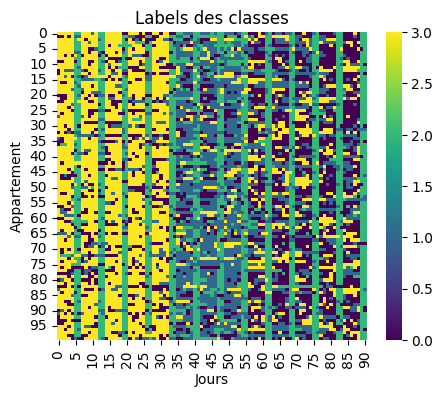

In [ ]:
import seaborn as sns

# Plotting the heatmap
plt.figure(figsize=(5, 4))  # Adjust the figure size if needed
sns.heatmap(Y, cmap='viridis')  # Use a color map of your choice
plt.title('Labels des classes')
plt.xlabel('Jours')
plt.ylabel('Appartement')
plt.show()

En visualisant la matrice heatmap on voit bien que le cluster 3 (comme mentionné auparavant) présente la consommation de l'énergie durant les weekends car le cluster 3 se répète chaque 5 jours. Le cluster 2 présente une vacance de 3 semaines. Le cluster 1 et 4 présentent les jours ou les gens consomment plus d'énergie dans leurs appartements.

En comparant le cluster 1 et 4 on déduit que le cluster 1 présente les jours ou les gens consomment moins d'énergie par exemple l'automne par rapport au cluster 4 qui présente les jours ou les gens consomment plus d'énergie (pendant l'hivers par exemple).

# Partie 2 :

###Classification de données qualitatives Y (classification des 91 jours)

Ici nous devons d'abord calculer la transposée de Y

In [ ]:
# Transpose the time series data
Y_transposed = np.array(Y).T  # Transpose X using numpy

Nous appliquons k-modes pour faire le clustering dess jours.

Le nombre de clusters est déjà connu. Il est égale à 4

In [ ]:
from kmodes.kmodes import KModes

# Initialize the KModes model
n_clusters = 4  # Set the number of clusters
kmd = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)

# Fit the model to your data
jours_clusters = kmd.fit_predict(Y_transposed)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 51, cost: 2970.0
Run 1, iteration: 2/100, moves: 0, cost: 2970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4, cost: 3361.0
Run 2, iteration: 2/100, moves: 1, cost: 3358.0
Run 2, iteration: 3/100, moves: 1, cost: 3356.0
Run 2, iteration: 4/100, moves: 0, cost: 3356.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 36, cost: 2997.0
Run 3, iteration: 2/100, moves: 5, cost: 2970.0
Run 3, iteration: 3/100, moves: 0, cost: 2970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 29, cost: 2988.0
Run 4, iteration: 2/100, moves: 3, cost: 2969.0
Run 4, iteration: 3/100, moves: 0, cost: 2969.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/1

In [ ]:
jours_clusters

array([3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=uint16)

#

Nous réalisons la heatMap pour avoir une représentation similaire à celle de l'énoncé

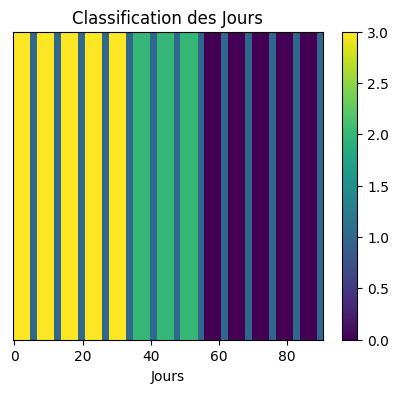

In [ ]:
# Reshape the data array to have one row and multiple columns
data_array = jours_clusters.reshape(1, -1)

# Create a vertical heatmap
plt.figure(figsize=(5, 4))
plt.imshow(data_array, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Classification des Jours')
plt.xlabel('Jours')
plt.yticks([])
plt.show()

La figure ci-dessus montre la visualisation du clustering appliqué sur 91 jours à l'aide de la matrice heatmap. La figure nous confirme nos suppositions précédentes.

